In [1]:
# load necessary imports and packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

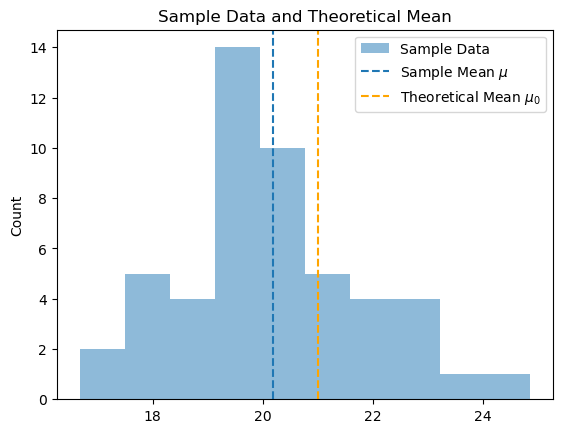

In [4]:
# generating sample data as a normal continuous random variable
sample_data = stats.norm.rvs(loc=20, scale=2, size=50, random_state=5)

# plot data as well as theoritical mean of 21 
fig, ax = plt.subplots()
ax.hist(sample_data, alpha=0.5, label="Sample Data")
ax.axvline(sample_data.mean(), linestyle="--", label=r"Sample Mean $\mu$")
ax.axvline(21, linestyle="--", color="orange", label=r"Theoretical Mean $\mu_{0}$")
ax.set_title("Sample Data and Theoretical Mean")
ax.set_ylabel("Count")
ax.legend()


In [6]:
stats.ttest_1samp(sample_data, 23)

TtestResult(statistic=-11.601390168781101, pvalue=1.1597564948233709e-15, df=49)

In [8]:
sb_data = pd.read_csv(r"C:\Users\user\Downloads\superbowl.csv")
sb_data.tail()

,Super Bowl,Coin Toss Outcome,Coin Toss Winner,Game Winner
50,51,Tails,Home Team,Away Team
51,52,Heads,Home Team,Away Team
52,53,Tails,Home Team,Away Team
53,54,Tails,Away Team,Home Team
54,55,Heads,Away Team,Home Team


In [9]:
coin_toss_counts = sb_data["Coin Toss Outcome"].value_counts().sort_index()
coin_toss_counts

Coin Toss Outcome
Heads    26
Tails    29
Name: count, dtype: int64

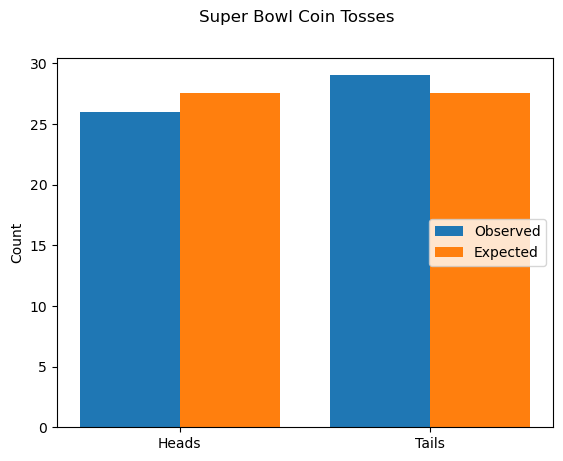

In [10]:
fig, ax = plt.subplots()

# Extract observed counts
fair_coin_observed = coin_toss_counts.values
# Heads and tails each expected half the time
fair_coin_expected = [sum(coin_toss_counts)/2, sum(coin_toss_counts)/2]

# Placeholder data for display purposes; you can ignore these values
x = np.array([0, 5])
offset = 1
bar_width = 2

# Plot bars
ax.bar(x-offset, fair_coin_observed, bar_width, label="Observed")
ax.bar(x+offset, fair_coin_expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Heads", "Tails"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Coin Tosses");

In [11]:
fair_coin_result = stats.chisquare(fair_coin_observed, fair_coin_expected)
fair_coin_result

Power_divergenceResult(statistic=0.16363636363636364, pvalue=0.6858304344516056)

In [12]:
game_winner_counts_sb = sb_data["Game Winner"].value_counts().sort_index()
game_winner_counts_sb

Game Winner
Away Team    31
Home Team    24
Name: count, dtype: int64

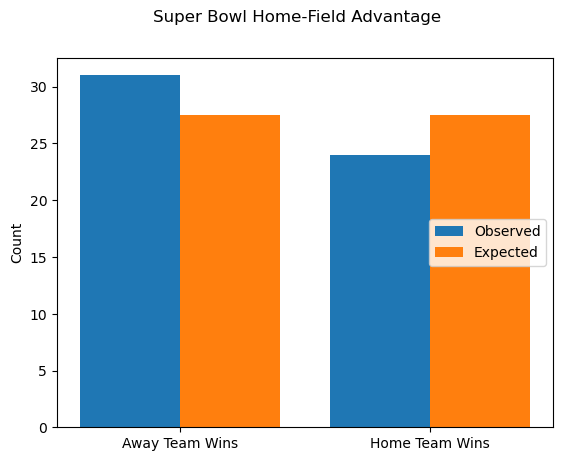

In [13]:
fig, ax = plt.subplots()

# Extract data
observed = game_winner_counts_sb.values
expected = [sum(game_winner_counts_sb)/2, sum(game_winner_counts_sb)/2]

# Plot bars
ax.bar(x-offset, observed, bar_width, label="Observed")
ax.bar(x+offset, expected, bar_width, label="Expected")

# Customize appearance
ax.set_xticks(x)
ax.set_xticklabels(["Away Team Wins", "Home Team Wins"])
ax.set_ylabel("Count")
ax.legend(loc="right")
fig.suptitle("Super Bowl Home-Field Advantage");

In [14]:
home_field_advantage_result_sb = stats.chisquare(observed, expected)
home_field_advantage_result_sb

Power_divergenceResult(statistic=0.8909090909090909, pvalue=0.34523107177184)